In [153]:
import csv
import functools
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [154]:
df_states = pd.read_csv('daily_data.csv', usecols=[0,1,2,3])
df_us = pd.read_csv('us_daily.csv')
df_race = pd.read_csv('race_data.csv')
df_race.rename(columns = {'Date':'date', 'Deaths_NHPI':'Deaths_Native_Hawaiian_Pacific_Islander', 'Deaths_AIAN': 'Deaths_americanIndian_alaskanNative'}, inplace=True)

In [155]:
def datez(df):
    df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
    return df

In [156]:
df_states = df_states['date'] >= pd.to_datetime('2020-04-12')

TypeError: Invalid comparison between dtype=int64 and Timestamp

In [157]:
df_race.index = df_race.index - 55

In [158]:
df_states.index = df_states.index + 1

In [159]:
df_race.drop(['Deaths_Ethnicity_NonHispanic'], axis=1, inplace=True)

In [161]:
datez(df_race)
df_race.index = df_race.index + 55

In [162]:
datez(df_states)
df_states

,date,state,positive,negative
1,2020-07-15,AK,1631.0,154462.0
2,2020-07-15,AL,59067.0,481982.0
3,2020-07-15,AR,30297.0,365479.0
4,2020-07-15,AS,0.0,816.0
5,2020-07-15,AZ,131354.0,604608.0
...,...,...,...,...
7405,2020-01-26,WA,2.0,0.0
7406,2020-01-25,WA,2.0,0.0
7407,2020-01-24,WA,2.0,0.0
7408,2020-01-23,WA,2.0,0.0


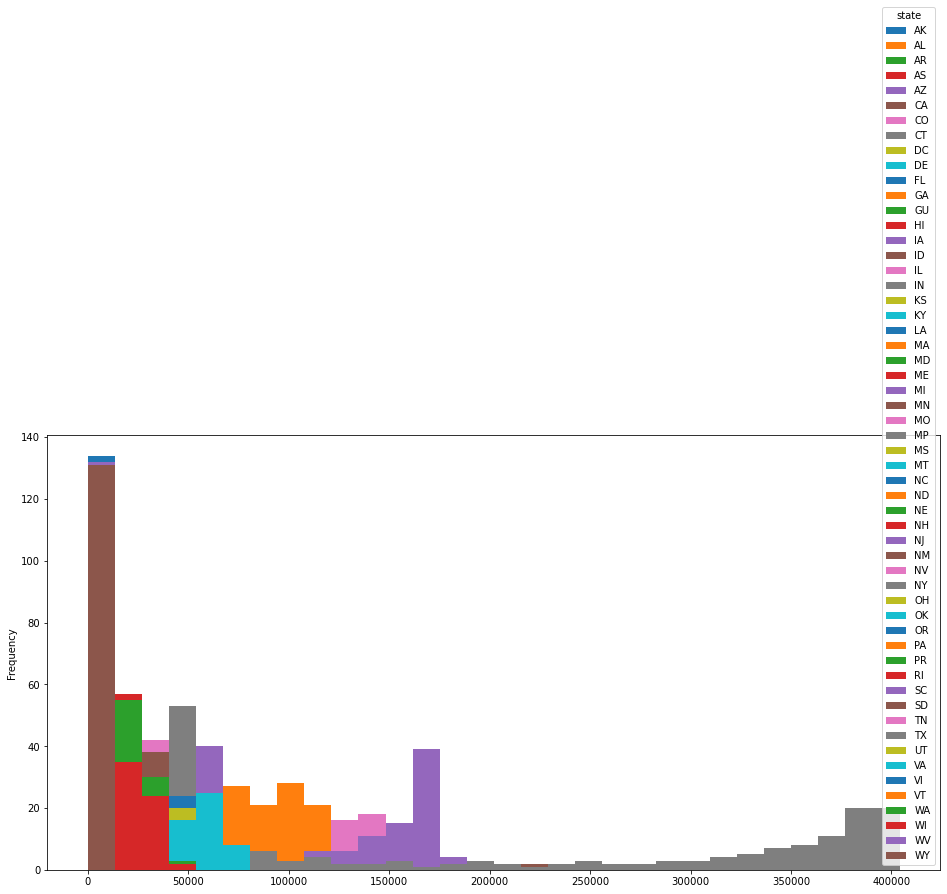

In [189]:
df_states.groupby(["date","state"])['positive'].mean().unstack().plot(figsize=(16, 8),kind='hist', bins=30)

In [164]:
# df_race.groupby(['State', 'date'])['Cases_Total'].mean()

DataError: No numeric types to aggregate

In [171]:
# df_race['Cases_Total'] = df_race['Cases_Total'].apply(pd.to_numeric, errors='coerce')

In [177]:
# df_race.groupby(['State', 'date'])x.mean().unstack().plot()

SyntaxError: invalid syntax (<ipython-input-177-3e270de444a0>, line 1)

In [175]:
# x = df_race['Cases_Total']//10000

In [176]:
# df_race['Cases_Total'] = x.apply(pd.to_numeric, errors='coerce')